In [168]:
import pandas as pd
import numpy as np
import seaborn as sns

====================================================================================================

**Goal : gather similar companies according to their features and number of trading days**

**Use : provide coherent and meaningful data to model**


**(_Ideal_ : develop tailored model to each type of groups)**

====================================================================================================

# Anaysis of Companies Age

## Looking at the Metadata from `nasdaq_us_stats.xls`

In [169]:
#!!!Path might not be the same!!!

meta_df = pd.read_csv('../raw_data/metadata/nasdaq_us_stats.xls')

In [170]:
meta_df.head()

,Unnamed: 0,stock,days,min_close,max_close,start_date,end_date
0,0,AACG.US,3165,0.21703,3.850,2008-01-28,2021-01-25
1,1,AACQ.US,96,9.62000,11.070,2020-09-08,2021-01-25
2,2,AACQU.US,134,10.00000,11.900,2020-07-15,2021-01-25
3,3,AACQW.US,95,1.07500,2.580,2020-09-09,2021-01-25
4,4,AAL.US,1793,9.04000,56.989,2013-12-10,2021-01-25


In [171]:
meta_df.describe()

,Unnamed: 0,days,min_close,max_close
count,3921.000000,3921.000000,3921.000000,3.921000e+03
mean,1960.000000,1876.186942,8.257047,6.181576e+06
std,1132.039531,1795.084440,16.268917,3.863434e+08
min,0.000000,1.000000,0.001000,2.400000e-01
25%,980.000000,312.000000,1.490000,1.438700e+01
50%,1960.000000,1286.000000,5.010000,2.880000e+01
75%,2940.000000,3775.000000,10.384000,6.533000e+01
max,3920.000000,12879.000000,647.290000,2.419200e+10


In [172]:
meta_df = meta_df[['stock', 'days', 'min_close', 'max_close']]

### Company age classification

In [173]:
meta_df['range_price'] = meta_df['max_close'] - meta_df['min_close']
meta_df['years'] = meta_df['days']/365

In [174]:
clean_meta_df = meta_df[['stock', 'years', 'range_price']]

<AxesSubplot:xlabel='years', ylabel='Count'>

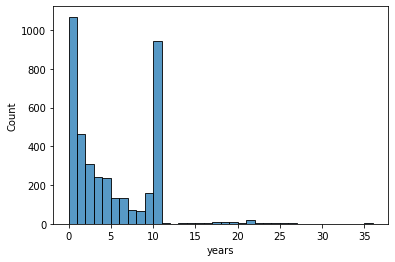

In [175]:
sns.histplot(clean_meta_df['years'], binwidth=1)

👆👆**Anomaly at less than 1 year and 10 year old companies**👆👆

In [180]:
bins = [0, 1, 5, 10, 15, 20, 25, 30, 40]

clean_meta_df['company_vintage'] = pd.cut(meta_df['years'].copy(), 
                                          bins)                            # A company aged of 1Y and one day is
                                          #labels=['(0, 1]','(1, 5]',       # part of the '(1, 5]' class
                                          #        '(5, 10]', '(10, 15]',
                                          #        '(15, 20]', '(20, 25]',
                                          #        '(25, 30]', '(30, 40]'])
print(clean_meta_df['company_vintage'])

0        (5, 10]
1         (0, 1]
2         (0, 1]
3         (0, 1]
4         (1, 5]
5        (5, 10]
6        (5, 10]
7       (10, 15]
8       (25, 30]
9       (10, 15]
10      (10, 15]
11      (10, 15]
12        (0, 1]
13        (0, 1]
14        (1, 5]
15      (10, 15]
16      (10, 15]
17        (0, 1]
18        (0, 1]
19        (1, 5]
20       (5, 10]
21        (0, 1]
22        (0, 1]
23        (0, 1]
24      (10, 15]
25        (0, 1]
26        (0, 1]
27        (0, 1]
28        (1, 5]
29        (0, 1]
          ...   
3891     (5, 10]
3892     (5, 10]
3893      (0, 1]
3894      (0, 1]
3895      (0, 1]
3896      (0, 1]
3897      (0, 1]
3898      (1, 5]
3899    (20, 25]
3900      (1, 5]
3901      (0, 1]
3902      (0, 1]
3903      (0, 1]
3904    (10, 15]
3905    (10, 15]
3906      (1, 5]
3907      (1, 5]
3908      (1, 5]
3909     (5, 10]
3910      (0, 1]
3911      (0, 1]
3912      (0, 1]
3913      (0, 1]
3914      (1, 5]
3915      (1, 5]
3916    (10, 15]
3917     (5, 10]
3918      (1, 

/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [150]:
clean_meta_df['company_vintage'].apply(str)
print(clean_meta_df.info())
clean_meta_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3921 entries, 0 to 3920
Data columns (total 4 columns):
stock              3921 non-null object
years              3921 non-null float64
range_price        3921 non-null float64
company_vintage    3921 non-null category
dtypes: category(1), float64(2), object(1)
memory usage: 95.9+ KB
None


,stock,years,range_price,company_vintage
0,AACG.US,8.671233,3.63297,"(5, 10]"
1,AACQ.US,0.263014,1.45000,"(0, 1]"
2,AACQU.US,0.367123,1.90000,"(0, 1]"
3,AACQW.US,0.260274,1.50500,"(0, 1]"
4,AAL.US,4.912329,47.94900,"(1, 5]"


### Company age classification [Results]

<AxesSubplot:xlabel='years', ylabel='Count'>

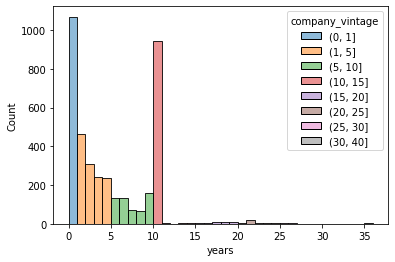

In [133]:
sns.histplot(data=clean_meta_df, x='years', binwidth=1, hue='company_vintage')

In [153]:
sdfg = clean_meta_df.copy()
sdfg['company_vintage'] = sdfg['years'].apply(lambda x: binning_years(x))

TypeError: unsupported operand type(s) for &: 'float' and 'float'

In [107]:
clean_meta_df.groupby('company_vintage')['stock'].count()

company_vintage
(0, 1]      1069
(1, 5]      1252
(5, 10]      564
(10, 15]     950
(15, 20]      32
(20, 25]      37
(25, 30]      13
(30, 40]       4
Name: stock, dtype: int64

In [111]:
clean_meta_df.loc[clean_meta_df['company_vintage'] == '(0, 1]']

,stock,years,range_price,company_vintage


In [118]:
clean_meta_df.groupby(pd.cut(meta_df['years'], bins)).count()

,stock,years,range_price,company_vintage
years,,,,
"(0, 1]",1069,1069,1069,1069
"(1, 5]",1252,1252,1252,1252
"(5, 10]",564,564,564,564
"(10, 15]",950,950,950,950
"(15, 20]",32,32,32,32
"(20, 25]",37,37,37,37
"(25, 30]",13,13,13,13
"(30, 40]",4,4,4,4


In [166]:
def tickers_in_bins(x):
    if x == '(0, 1]'
    elif x == '(1, 5]'
    elif x == '(5, 10]'
    elif x == '(10, 15]'        
    elif x = '(15, 20]'        
    elif x = '(20, 25]'        
    elif x = '(25, 30]'        
    elif x = '(30, 40]'
    return True

SyntaxError: invalid syntax (<ipython-input-166-4820a2a123bc>, line 2)

In [ ]:
clean_meta_df

In [186]:
i = 0

stocks_bin_1 = []
stocks_bin_2 = []
stocks_bin_3 = []
stocks_bin_4 = []
stocks_bin_5 = []
stocks_bin_6 = []
stocks_bin_7 = []
stocks_bin_8 = []

for idx, row in clean_meta_df.iterrows():
    x = row['company_vintage']
    if x == '(0, 1]': stocks_bin_1.append(row['stock'])
    elif x == '(1, 5]': stocks_bin_2.append(row['stock'])
    elif x == '(5, 10]': stocks_bin_3.append(row['stock'])
    elif x == '(10, 15]': stocks_bin_4.append(row['stock'])        
    elif x == '(15, 20]': stocks_bin_5.append(row['stock'])        
    elif x == '(20, 25]': stocks_bin_6.append(row['stock'])        
    elif x == '(25, 30]': stocks_bin_7.append(row['stock'])        
    elif x == '(30, 40]': stocks_bin_8.append(row['stock'])


In [187]:
stocks_bin_1

[]